# Logistic Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import make_classification

### Create Dataset

In [12]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=43)

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-1.129510,0.313954,0.226078,-0.602014,0.364379,1.495656,0.289715,1.295559,-0.949006,0.947923
1,0.764545,1.593521,-0.486190,-0.331393,-0.361425,-0.561112,0.680599,-0.723086,0.492374,-0.036138
2,-0.906067,1.432046,-2.108286,0.157747,1.040965,-2.625549,0.481348,-0.501548,0.646272,1.066529
3,1.038484,-0.032419,-2.774775,-0.324353,-0.859559,-0.813757,-0.812063,-1.402447,0.917563,0.687776
4,-2.299785,3.140142,-0.865061,-1.259801,1.931235,0.309015,1.422955,2.225362,-1.322112,-1.902240
...,...,...,...,...,...,...,...,...,...,...
995,0.660264,-0.708928,1.565611,-0.314670,-0.721552,-1.070590,-0.703302,-1.413346,0.958831,-0.210503
996,-2.562809,0.749578,-1.422529,1.584695,0.041969,-1.039793,-0.993587,-0.589209,0.480600,-0.114143
997,-0.677147,-1.655376,0.519085,1.278970,-1.559456,0.920620,-0.904188,-1.084067,0.498088,0.841691
998,-0.244108,0.874514,-0.721472,1.424230,-0.448167,-0.050433,-0.510640,-0.503459,0.296456,1.509820


In [14]:
pd.DataFrame(y)

,0
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,1
998,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=300, random_state=42) 

### Model Training

In [10]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [11]:
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
logistic.predict_log_proba(X_test)

array([[-6.07961412e+00, -2.29168369e-03],
       [-7.56454404e-03, -4.88806309e+00],
       [-7.94151682e-01, -6.01415180e-01],
       [-2.41229878e+00, -9.38811738e-02],
       [-4.22380074e+00, -1.47511501e-02],
       [-2.86304113e-01, -1.39043967e+00],
       [-2.87469195e+00, -5.80884567e-02],
       [-1.22332724e-02, -4.40970620e+00],
       [-2.60484237e+00, -7.67890263e-02],
       [-2.15261577e-03, -6.14214766e+00],
       [-3.74440995e+00, -2.39337196e-02],
       [-4.69703310e+00, -9.16416496e-03],
       [-1.44508111e+00, -2.68830165e-01],
       [-4.67238944e-02, -3.08677057e+00],
       [-4.88243036e-02, -3.04383989e+00],
       [-2.81141067e+00, -6.20032021e-02],
       [-1.20476517e+01, -5.85831391e-06],
       [-2.49237110e-04, -8.29723048e+00],
       [-2.33496038e+00, -1.01827119e-01],
       [-1.97795193e-02, -3.93298172e+00],
       [-4.17702693e-02, -3.19638289e+00],
       [-4.40344964e-01, -1.03230303e+00],
       [-2.17219271e+00, -1.20956541e-01],
       [-5.

### Accuracy, Confussion Matrix, Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
score = accuracy_score(y_test, y_pred)
score

0.93

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,  15],
       [  6, 141]], dtype=int64)

In [ ]:
cr = classification_report(y_test, y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.96      0.90      0.93       153\n           1       0.90      0.96      0.93       147\n\n    accuracy                           0.93       300\n   macro avg       0.93      0.93      0.93       300\nweighted avg       0.93      0.93      0.93       300\n'

### Hyperparameter Tuning and Cross Validation

In [ ]:
model = LogisticRegression()
penalty = ["l1","l2", "elasticnet"]
c_values = [100, 10 , 1.0, 0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag" , "saga"]

In [ ]:
params = dict(penalty= penalty, C= c_values, solver = solver)

#### GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs= -1)

In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

c:\Harry\MLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _ch

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_ 

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid.best_score_

0.9328571428571429

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
score = accuracy_score(y_pred,y_test)
score

0.9266666666666666

In [ ]:
cr1 = classification_report(y_pred, y_test)
cr1

'              precision    recall  f1-score   support\n\n           0       0.90      0.96      0.93       143\n           1       0.96      0.90      0.93       157\n\n    accuracy                           0.93       300\n   macro avg       0.93      0.93      0.93       300\nweighted avg       0.93      0.93      0.93       300\n'

In [ ]:
cm1 = confusion_matrix(y_pred, y_test)
cm1

array([[137,   6],
       [ 16, 141]], dtype=int64)

### Randomize Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv = 5, scoring="accuracy")

In [ ]:
randomcv.fit(X_train , y_train)

c:\Harry\MLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _chec

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
randomcv.best_score_

0.9328571428571429

In [ ]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

In [ ]:
y_pred = randomcv.predict(X_test)

In [ ]:
score = accuracy_score(y_pred, y_test)
score

0.92

In [ ]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92       141\n           1       0.96      0.89      0.92       159\n\n    accuracy                           0.92       300\n   macro avg       0.92      0.92      0.92       300\nweighted avg       0.92      0.92      0.92       300\n'

In [ ]:
confusion_matrix(y_pred, y_test)

array([[135,   6],
       [ 18, 141]], dtype=int64)

### Logistic Classification for MultiClass Classifications Problem

##### Creating the data

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative= 3, n_classes=3 , random_state=15)

In [ ]:
X

array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]])

In [ ]:
# 0 1 and 2
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class="ovr")

In [ ]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
score = accuracy_score(y_pred, y_test)
score

0.79

In [ ]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.84        97\n           1       0.73      0.81      0.77        91\n           2       0.82      0.71      0.76       112\n\n    accuracy                           0.79       300\n   macro avg       0.79      0.79      0.79       300\nweighted avg       0.79      0.79      0.79       300\n'

### Logistic Regression of Imbalanced Dataset

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant= 0, weights=[0.99], random_state=10)

In [ ]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Counter(y)

Counter({0: 9846, 1: 154})

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue = y)

<Axes: xlabel='0', ylabel='1'>

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [ ]:
y_test.size

2500

In [ ]:
X_test

array([[ 0.98127557, -1.35935877],
       [ 1.17429209, -1.05606727],
       [ 0.78544246,  0.55707056],
       ...,
       [ 1.42930361,  1.08387948],
       [ 1.59928044, -1.52787825],
       [ 1.26962889, -0.08325369]])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1,0.1, 0.01]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [ ]:
params = dict(penalty = penalty, C= c_values, solver = solver, class_weight = class_weight)

In [ ]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv= cv)

In [ ]:
grid.fit(X_train, y_train)

c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Harry\MLearning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was re

In [ ]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
grid.best_score_, grid.best_estimator_

(0.9873333333333333,
 LogisticRegression(C=0.01, class_weight={0: 10, 1: 50}, solver='newton-cg'))

In [ ]:
y_pred =grid.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9916
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2483
           1       0.42      0.59      0.49        17

    accuracy                           0.99      2500
   macro avg       0.71      0.79      0.74      2500
weighted avg       0.99      0.99      0.99      2500

[[2469   14]
 [   7   10]]


In [ ]:
y_train.shape

(7500,)

### Logistic Regression with ROC curve and ROC AUC Score

In [ ]:
from sklearn.datasets  import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2 , random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
# Create a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# We get model probab prediction based on probablity to fall in diff categories
model_prob = model.predict_proba(X_test)

In [ ]:
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [ ]:
# Getting the one probab from 2 one 
model_prob = model_prob[:, 1]

In [ ]:
# Lets calculate the score 
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [ ]:
# Calculate ROC Curve 
dummy_fpr , dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr , model_tpr , thresholds= roc_curve(y_test, model_prob)

In [ ]:
thresholds

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

In [ ]:
import matplotlib.pyplot  as plt

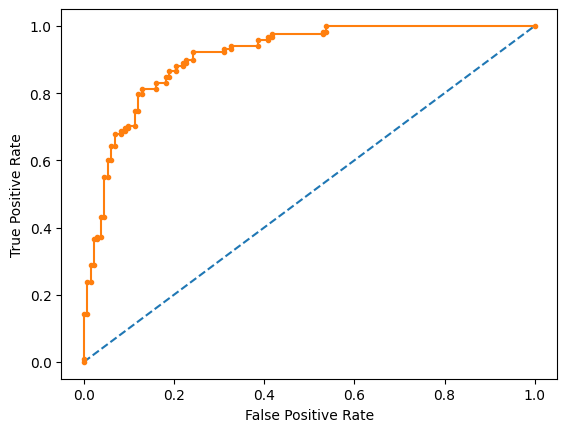

In [ ]:
# Plot ROC Curve for model
plt.plot(dummy_fpr, dummy_tpr, linestyle= "--", label= "Dummy Model")
plt.plot(model_fpr, model_tpr, marker= ".", label= "Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

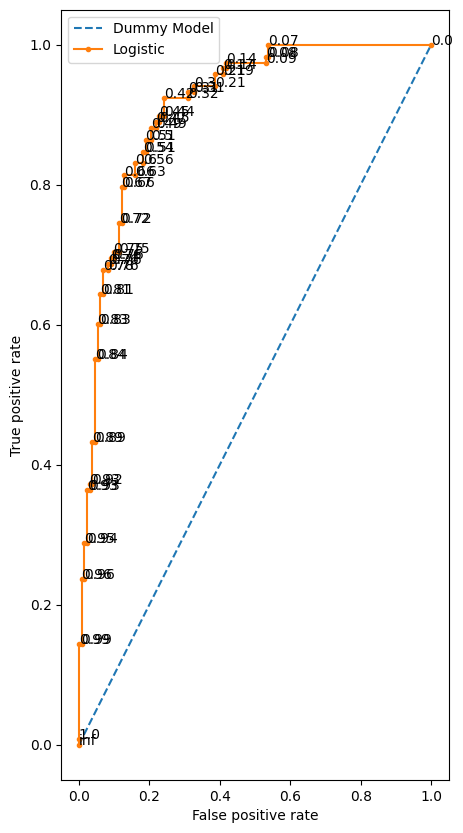

In [ ]:
import numpy as np
fig = pyplot.figure(figsize=(5,10))
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate("%s" % np.round(xyz[2], 2), xy = (xyz[0],xyz[1]))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle = "--", label = "Dummy Model")
pyplot.plot(model_fpr, model_tpr, marker =".", label = "Logistic")
pyplot.xlabel("False positive rate")
pyplot.ylabel("True positive rate")
pyplot.legend()
pyplot.show()